<a href="https://www.kaggle.com/code/robertomoragadiaz/notebook-data-analytics-solucion?scriptVersionId=193611089" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-eng-salary-2024/Dataset salary 2024.csv
/kaggle/input/bbdd-kanban-game-01/BBDD_kanban_game_kaggle - Hoja 1.csv


## INICIO
escribe aquí lo que quieras.

*esto es Markdown*

## Intro

**Análisis de datos:** es el proceso de examinar, limpiar, transformar e interpretar datos para extraer información útil, apoyar la toma de decisiones y generar conocimiento.

**Importancia:**
Es crucial porque permite a las organizaciones y personas tomar decisiones informadas basadas en hechos y patrones (data-driven) para: 
* optimizar procesos, 
* identificar oportunidades y riesgos, y 
* mejorar resultados en diversos ámbitos, desde negocios hasta ciencia y tecnología.


El análisis de datos es fundamental para la experimentación y innovación porque proporciona una base objetiva para evaluar hipótesis, medir resultados y validar nuevas ideas. 

## Carga de librerias

In [2]:
#Importamos librerias de la siguiente forma:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib
import pandas as pd #pandas
import seaborn as sns

## Soltar las manos

In [3]:
#crea un dataset con la vida media de los clientes del banco
vida = np.random.uniform(3, 32, size=100)

print(vida)

[ 6.59366756 18.70035831 24.35204995 20.46166246  4.93756962 23.60625478
 18.76872576 29.23002251 29.22560092 24.81659711 29.52981225 20.5880717
  4.5535513  19.01145016 30.38377958  9.21027457 16.60757688 31.12618706
 27.83268144 30.64860296 16.88260012 25.66431616 15.31445631 30.79819166
 17.115712   18.32239481 17.99214841  4.96437371 24.48358593  8.76026172
 27.21049876 10.08817119 13.09737194  4.51005099 19.86273313 19.70709006
  6.10924116 24.66942035 21.31257729 21.8222685  29.03315609 15.14201361
 17.4632148  30.81033125 30.25363505  8.16308012 27.158505    4.40771517
 29.52427106 14.07254456 30.44057974 20.80176395 18.71572369 21.63276079
  6.311903   12.72678136 31.84308865 28.07445075  9.39954581 18.27820366
  7.40853747 15.39673517 13.83275546  3.81101043 31.9031855  17.50125898
 12.75025192 29.43022641 26.75721225 21.27847335  4.60123118 27.71630656
 24.29295289 30.69971982  9.19430298 25.30979449 15.8942182  22.22117094
 15.32234601 27.0915534  24.24302486 24.72540223 25.

In [4]:
#calcula la media con 1 decimal
media_vida = np.mean(vida).round(1)
print(media_vida, 'meses')

19.5 meses


In [5]:
#crea dataset con el ARPU del cliente
media= 22 #dolares
sigma= 3 #dolares

arpu = np.random.normal(media, sigma, size=100)

print(arpu)

[23.11000954 23.94700614 21.27454867 20.67227248 26.06402703 16.07725861
 17.79814749 18.55305367 21.85662394 22.41549146 17.21609171 24.03752529
 14.68429401 22.93667184 18.5224392  20.02602043 14.35548396 24.42598708
 22.45837875 27.75194881 19.34085617 13.27397201 24.52555968 19.86705359
 17.92636712 25.11583265 16.96403738 25.224102   20.19989835 19.10044444
 23.99852747 22.41576681 20.61653811 23.05945513 20.89815007 21.27922592
 17.72126329 19.39534261 23.2904637  27.55058336 22.87009574 17.01155697
 23.52430629 23.86957447 24.27638848 20.76646818 24.94905405 21.72731156
 20.71951699 19.94577178 26.06491517 17.77463178 18.34810833 23.66339349
 25.21358218 23.3254223  26.02310335 21.4688847  23.26319025 20.81205049
 22.96075462 25.3328492  18.16680848 22.72133786 17.05041444 19.63631644
 18.79796018 16.91695858 19.48908855 23.19159402 20.59735473 23.88671698
 22.45365421 24.95748522 24.75964314 22.15270613 21.01644783 19.9881801
 20.4271449  24.10324206 25.20479086 20.75623829 25.

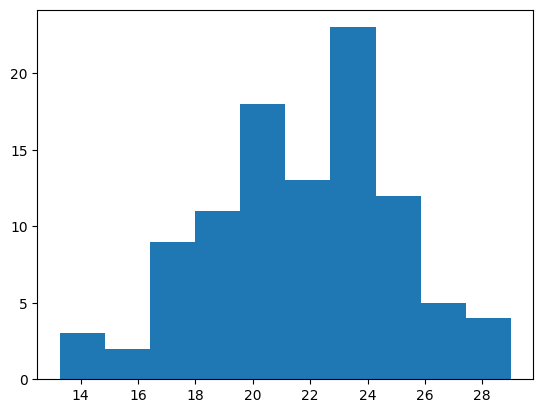

In [6]:
#graficar ARPU
plt.hist(arpu)
plt.show()

**Pregunta:**

¿existirá una relación entre la permanencia de los clientes (vida) y el ARPU ?

Respuesta: Desarrollemos una visualización por medio de una diagrama de dispersión:

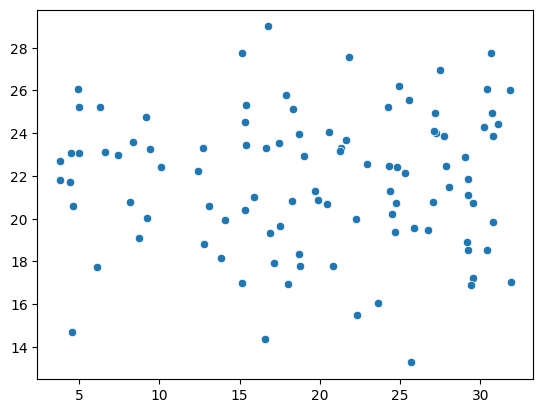

In [7]:
#Seaborn
sns.scatterplot(x=vida, y=arpu)
plt.show()

*Nota: no existe relación, ya que los dataset de ambas variables fueron creados de forma independiente.*

## Preparar la base de datos

In [8]:
#Cargamos la base de datos a estudiar
data = pd.read_csv("/kaggle/input/bbdd-kanban-game-01/BBDD_kanban_game_kaggle - Hoja 1.csv")

#Muestra los primeros registros para verificar que se ha cargado correctamente
data.head()

#prueba con: data.tail()

,Equipo,Fecha,Ciclo/experimento,WIP,Producto terminado,t inicio,t fin,LT min,Minuto del ciclo,Lead time,Q semiterminado,q Defecto,utilizacion,Valor
0,Team A masisa,9-11-2018,1,20,1,NaN,NaN,NaN,NaN,88.0,30.0,2.0,1.0,-1000.0
1,Team A masisa,9-11-2018,1,20,2,NaN,NaN,NaN,NaN,109.0,NaN,1.0,NaN,NaN
2,Team A masisa,9-11-2018,1,20,3,NaN,NaN,NaN,NaN,134.0,NaN,1.0,NaN,NaN
3,Team A masisa,9-11-2018,1,20,4,NaN,NaN,NaN,NaN,153.0,NaN,1.0,NaN,NaN
4,Team A masisa,9-11-2018,1,20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


vemos datos NaN, debemos limpiar la base

Nota: otra forma de leer un dataset:

> #base de datos en google sheet compartida como CSV

> url = 'https://docs.google.com/spreadsheets/d/1QY3gsmqj8ulg0dHGvkumH2rLMUy039bEBPL43Hg9gMo/pub?gid=0&single=true&output=csv'

> #lectura de la 'base de datos' de los equipos agile

> df = pd.read_csv(url)

In [9]:
#quitar registros sin leadtime
base = data.dropna(subset=['Lead time'])

#reemplazar registros con NAN por cero (0)
base = base.fillna(0)

base.head()

,Equipo,Fecha,Ciclo/experimento,WIP,Producto terminado,t inicio,t fin,LT min,Minuto del ciclo,Lead time,Q semiterminado,q Defecto,utilizacion,Valor
0,Team A masisa,9-11-2018,1,20,1,0,0,0,0.0,88.0,30.0,2.0,1.0,-1000.0
1,Team A masisa,9-11-2018,1,20,2,0,0,0,0.0,109.0,0.0,1.0,0.0,0.0
2,Team A masisa,9-11-2018,1,20,3,0,0,0,0.0,134.0,0.0,1.0,0.0,0.0
3,Team A masisa,9-11-2018,1,20,4,0,0,0,0.0,153.0,0.0,1.0,0.0,0.0
5,Team A masisa,9-11-2018,1,20,6,0,0,0,0.0,251.0,0.0,1.0,0.0,0.0


In [10]:
#ver los tipos de datos
print(base.dtypes)

Equipo                 object
Fecha                  object
Ciclo/experimento       int64
WIP                     int64
Producto terminado      int64
t inicio               object
t fin                  object
LT min                 object
Minuto del ciclo      float64
Lead time             float64
Q semiterminado       float64
q Defecto             float64
utilizacion           float64
Valor                 float64
dtype: object


In [11]:
#Una vista rápida de los campos númericos y sus estadísticos principales

base.describe()

,Ciclo/experimento,WIP,Producto terminado,Minuto del ciclo,Lead time,Q semiterminado,q Defecto,utilizacion,Valor
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,2.695431,9.898477,7.616751,2.142132,98.378173,0.936548,0.276650,0.065508,48.705584
std,1.113703,6.466579,4.789495,1.428571,48.269353,4.456009,0.572582,0.227741,300.386688
min,1.000000,3.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,-1090.000000
25%,2.000000,6.000000,4.000000,1.000000,64.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000,7.000000,2.000000,82.500000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,15.000000,11.000000,3.000000,120.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,20.000000,23.000000,4.000000,292.000000,36.000000,3.000000,1.000000,2000.000000


Vamos a realizar una consulta para conocer los Equipos que contiene la base y la cantidad de experimentos que ha ejecutado cada equipo.

In [12]:
#crear tabla pivote
table1 = pd.pivot_table(
    data=base,
    index=['Equipo'],
    values=['Ciclo/experimento'], 
    aggfunc={'Ciclo/experimento': 'max'}, 
    margins=False
)
# Mostrar la tabla pivote
table1

,Ciclo/experimento
Equipo,
Team A Mariela,4
Team A Summit,4
Team A masisa,4
Team B Loreto,4
Team B Summit,4
Team B masisa,4
Team C Abi,4
Team ML,3


In [13]:
#Otra forma
# Crear tabla pivote con conteo de valores únicos en 'Ciclo/experimento' por 'Equipo'
table1 = pd.pivot_table(
    data=base,
    index=['Equipo'],
    values=['Ciclo/experimento'],
    aggfunc={'Ciclo/experimento': 'nunique'},
    margins=False
)

# Mostrar la tabla pivote
table1

,Ciclo/experimento
Equipo,
Team A Mariela,4
Team A Summit,4
Team A masisa,4
Team B Loreto,4
Team B Summit,4
Team B masisa,4
Team C Abi,4
Team ML,3


## Filtrar la muestra de trabajo

Queremos trabajar solo con el dataset de los experimentos del equipo 'Team ML'

In [14]:
#Filtrando experimentos solo del equipo ML

ml = base.query('Equipo == "Team ML"')
ml.head()


#otro filtro si quisieramos mirar registros de equipo ML y con WIP mayor o igual a 6.
#ml = base.query('Equipo == "Team ML" and WIP >= 6')

,Equipo,Fecha,Ciclo/experimento,WIP,Producto terminado,t inicio,t fin,LT min,Minuto del ciclo,Lead time,Q semiterminado,q Defecto,utilizacion,Valor
581,Team ML,14-08-2024,1,20,1,0:00:00,0:00:53,0:00:53,0.0,53.0,25.0,0.0,0.95,-600.0
582,Team ML,14-08-2024,1,20,2,0:00:09,0:01:20,0:01:11,1.0,71.0,0.0,0.0,0.00,0.0
583,Team ML,14-08-2024,1,20,3,0:00:10,0:01:40,0:01:30,1.0,90.0,0.0,1.0,0.00,0.0
584,Team ML,14-08-2024,1,20,4,0:00:40,0:02:00,0:01:20,2.0,80.0,0.0,1.0,0.00,0.0
585,Team ML,14-08-2024,1,20,5,0:00:20,0:02:20,0:02:00,2.0,120.0,0.0,2.0,0.00,0.0


In [15]:
#Creamos una vista general, para conocer por cada equipo los resultados de:
#cantidad de productos completados (cantidad), leadtime (media), tasa de defectos (media) y utilizacion (max)
#esto por el nivel de WIP exhibido en cada escenario de trabajo (3, 6,  y  push (20)

table1 = pd.pivot_table(
    data=ml,
    index=['Equipo', 'WIP'],
    values=['Producto terminado','Lead time','utilizacion', 'q Defecto', 'Q semiterminado', 'Valor'], 
    aggfunc={'Producto terminado':(np.size), 'Lead time': "mean", 'utilizacion':"max",'q Defecto':"sum", 'Q semiterminado':'sum', 'Valor':"sum"}, 
    margins=False #probar con True y ver qué ocurre
)
table1

Lead time  Producto terminado  Q semiterminado   Valor  \
Equipo  WIP                                                            
Team ML 3     66.250000                  12              3.0   780.0   
        6    100.928571                  14              5.0  1000.0   
        20   126.466667                  15             25.0  -600.0   

             q Defecto  utilizacion  
Equipo  WIP                          
Team ML 3          6.0         0.65  
        6          4.0         0.80  
        20        22.0         0.95

## Análisis de datos y visualizaciones

### Crear histogramas

#### Con pandas

Ojo: pandas sigue utilizando matplotlib en segundo plano para la visualización.

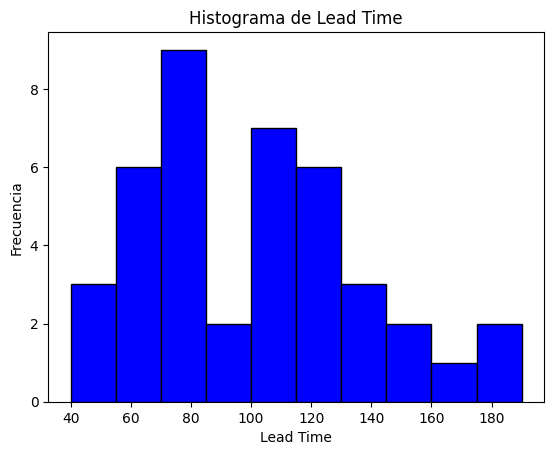

In [16]:
# Crear el histograma para la columna 'Lead time'
ml['Lead time'].plot(kind='hist', bins=10, color='blue', edgecolor='black')

# Configurar los títulos y etiquetas
plt.title('Histograma de Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
#Calcular la media, mediana y desviación estandar

media = np.mean(ml['Lead time'])
mediana = np.median(ml['Lead time'])
sigma = np.std(ml['Lead time'])


print('Media: ', media)
print('Median: ', mediana)
print('Desv. std: ', sigma.round(1)) #para redondear el valor


Media:  100.1219512195122
Median:  104.0
Desv. std:  36.2


### Con Matplotlib

### Un ejemplo práctico del uso de matplotlib (mostrando sus potencialidades)
La imagen de un agujero negro captado por múltiples telescopios y procesado con matplotlib [(Enlace al repositorio de código en github)](https://github.com/achael/eht-imaging):


![Agujero Negro](https://www.muylinux.com/wp-content/uploads/2019/04/bh.jpg)


Esto fue posible gracias a la investigación de la Dr. Katie Boumann y el equipo involucrado en el desarrollo de la librería [(Charla Ted relacionada)](https://www.youtube.com/watch?v=BIvezCVcsYs)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfacBn6MpmkpOr9JeywRqK_KBBJ553BdV24jz7y9L8qXQYNI-nY4OtgmoJWBWFSQxR9sM&usqp=CAU">

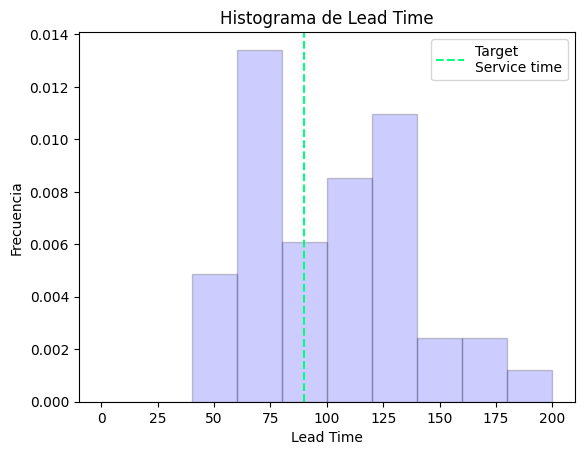

In [18]:
# Crear el histograma para la columna 'Lead time'
plt.hist(ml['Lead time'], bins=10, color='blue', edgecolor='black', range=[0, 200], density=True, alpha=0.2)

# Configurar los títulos y etiquetas
plt.title('Histograma de Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frecuencia')

# Añadir una línea horizontal en el eje X en 90 unidades de tiempo
plt.axvline(90, color='springgreen', linestyle='--', label='Target \nService time')

# Mostrar el histograma
plt.legend()
plt.show()


Histograma de leadtime segmentado por nivel de WIP

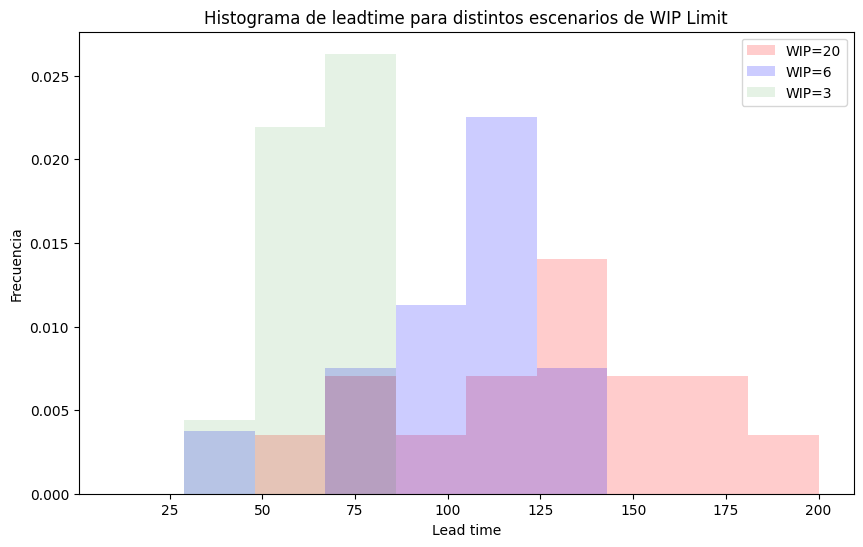

In [19]:
# Filtrar el dataset para WIP = 20
ml_wip20 = ml.query('WIP == 20')
ml_wip6 = ml.query('WIP == 6')
ml_wip3 = ml.query('WIP == 3')

# Crear el runchart
plt.figure(figsize=(10, 6))
plt.hist(ml_wip20['Lead time'], bins=10, range=(10, 200), color='r', alpha=0.2, label='WIP=20', density=True)
plt.hist(ml_wip6['Lead time'], bins=10, range=(10, 200), color='b', alpha=0.2, label='WIP=6', density=True)
plt.hist(ml_wip3['Lead time'], bins=10, range=(10, 200), color='g', alpha=0.1, label='WIP=3', density=True)
plt.xlabel('Lead time')
plt.ylabel('Frecuencia')
plt.title('Histograma de leadtime para distintos escenarios de WIP Limit')
plt.legend()
plt.show()

Al parecer si segmentamos por nivel de WIP los leadtime son diferentes.

**Preguntas (algunas) que surjen del análisis exploratorio de datos:**
¿Cuál nivel de WIP ofrece mejores tiempos 'Lead time' ?
¿existe una relación entre el nivel de WIP y el Leadtime ?

### Crear una gráfica de dispersión

* existe relación entre el tiempo 'leadtime' de los productos completados y la cantidad de WIP?
* existe relación entre el tiempo 'leadtime' y la calidad del producto?


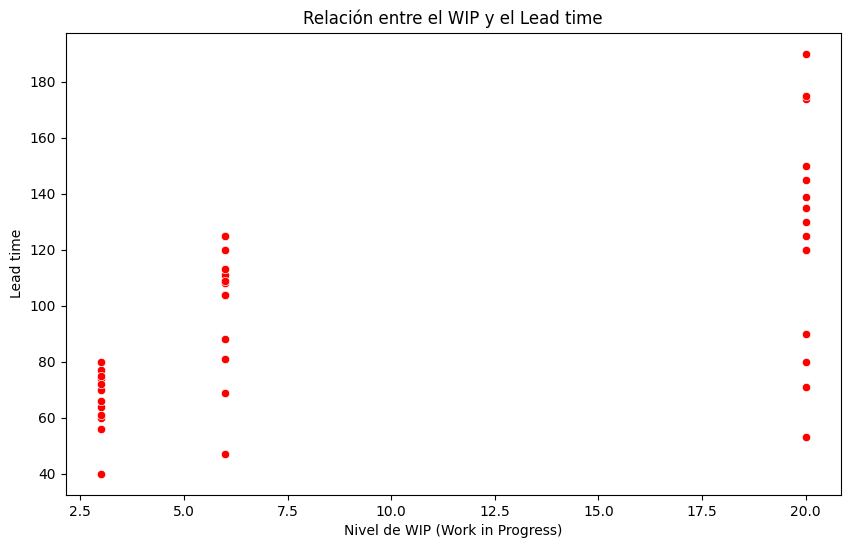

In [20]:
# Crear un grafico de dispersion
plt.figure(figsize=(10, 6))

sns.scatterplot(ml, x='WIP', y='Lead time', color='r')
# Definir los rangos de los ejes X e Y
#plt.ylim([0, 1])  # Reemplaza 'ymin' y 'ymax' con los valores deseados

plt.xlabel('Nivel de WIP (Work in Progress)')
plt.ylabel('Lead time')
plt.title('Relación entre el WIP y el Lead time')
plt.show()

La gráfica anterior nos arroja que existe una relación positiva:

a mayor WIP , existen mayores Lead time.

*Nota: recomendamos investigar sobre Ley de Little.*

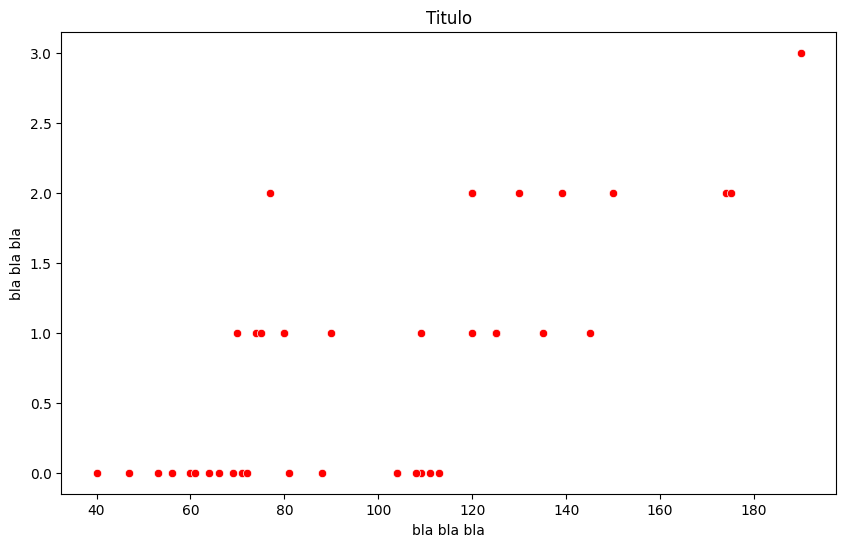

In [21]:
# Crear un grafico de dispersion
plt.figure(figsize=(10, 6))

sns.scatterplot(ml, x='Lead time', y='q Defecto', color='r')
# Definir los rangos de los ejes X e Y
#plt.ylim([0, 1])  # Reemplaza 'ymin' y 'ymax' con los valores deseados

plt.xlabel('bla bla bla')
plt.ylabel('bla bla bla')
plt.title('Titulo')
plt.show()

¿ qué podemos observar en esta gráfica?

< aquí sus comentarios >

**Material opcional**

In [22]:
#Calculemos el coeficiente de correlacion
correlation = ml['Lead time'].corr(ml['q Defecto'])
print(f"Correlación entre Lead time y q Defecto: {correlation}")

Correlación entre Lead time y q Defecto: 0.7112228495366605


In [23]:
#Utilizaremos scikit-learn para ajustar un modelo de regresión lineal:

from sklearn.linear_model import LinearRegression

# Reshape the data
X = ml['Lead time'].values.reshape(-1, 1)  # Convertir a formato columna
y = ml['q Defecto'].values

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
slope = model.coef_[0]
intercept = model.intercept_
print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")

Pendiente: 0.016512966028217866
Intercepto: -0.8728225742886424


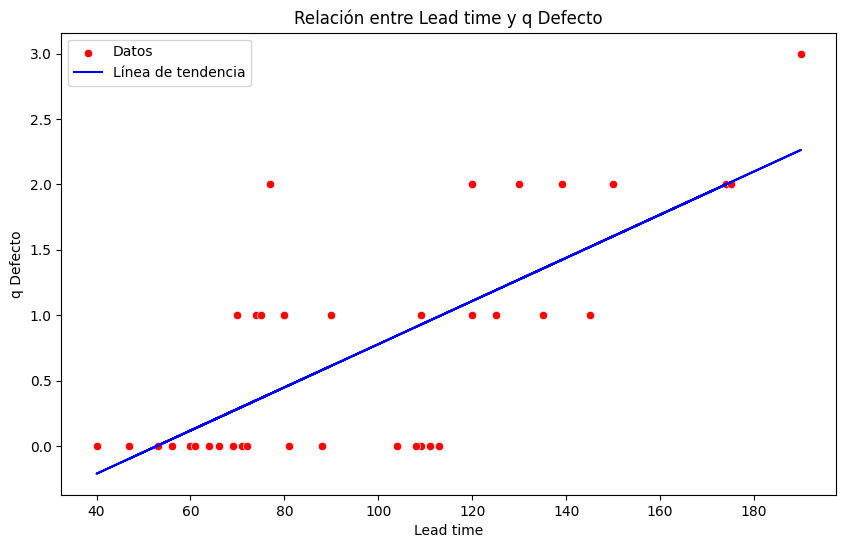

In [24]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lead time', y='q Defecto', data=ml, color='r', label='Datos')

# Generar predicciones para la línea de tendencia
y_pred = model.predict(X)

# Graficar la línea de tendencia
plt.plot(ml['Lead time'], y_pred, color='blue', label='Línea de tendencia')

# Configurar etiquetas y título
plt.xlabel('Lead time')
plt.ylabel('q Defecto')
plt.title('Relación entre Lead time y q Defecto')
plt.legend()

# Mostrar la gráfica
plt.show()

### Gráfica Boxplot

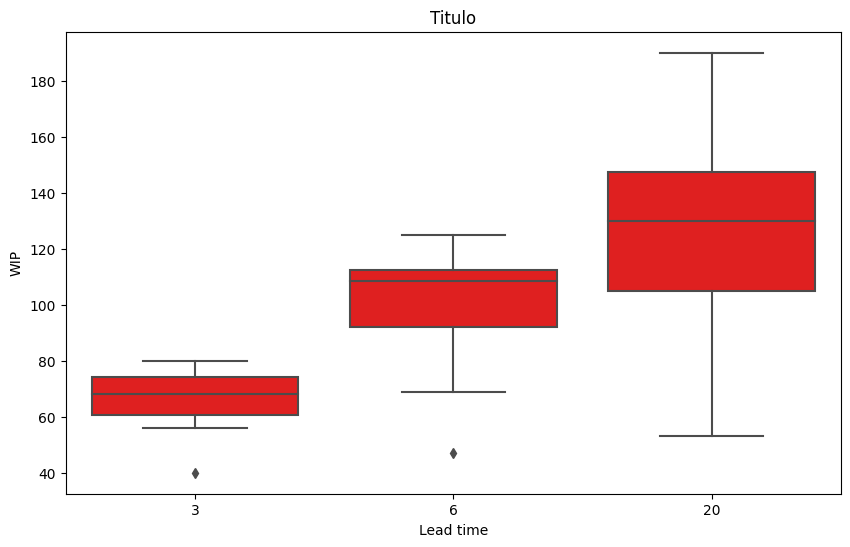

In [25]:
# Crear un Box Plot
plt.figure(figsize=(10, 6))

sns.boxplot(ml, x='WIP', y='Lead time', color='r')
# Definir los rangos de los ejes X e Y
#plt.ylim([0, 1])  # Reemplaza 'ymin' y 'ymax' con los valores deseados

plt.xlabel('Lead time')
plt.ylabel('WIP')
plt.title('Titulo')
plt.show()

¿qué ves en el Boxplot?, ¿cuáles son los elementos principales de est gráfico?

< Tu respuesta aquí >

**Bonus**

Investiga sobre un gráfico llamado Violinplot:

https://seaborn.pydata.org/generated/seaborn.violinplot.html

### Run chart

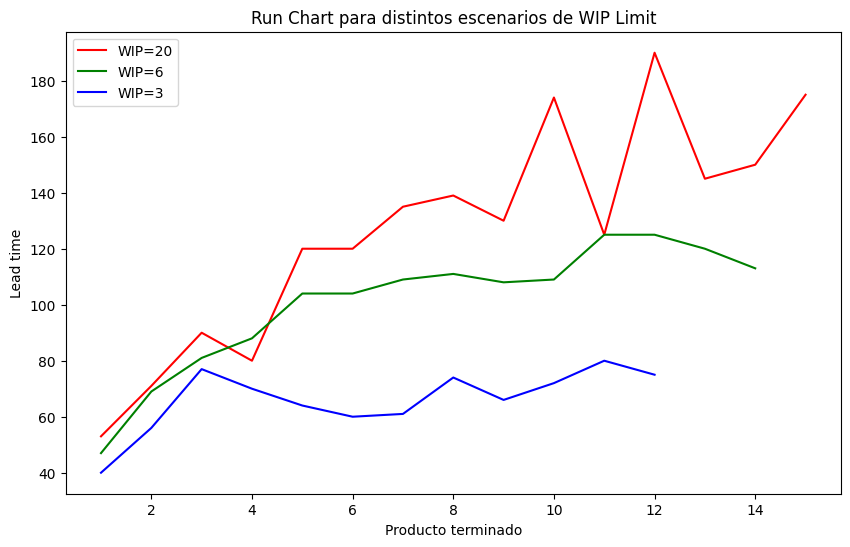

In [26]:
# Filtrar el dataset para WIP = 20
ml_wip20 = ml.query('WIP == 20')
ml_wip6 = ml.query('WIP == 6')
ml_wip3 = ml.query('WIP == 3')

# Crear el runchart
plt.figure(figsize=(10, 6))
plt.plot(ml_wip20['Producto terminado'],ml_wip20['Lead time'], color='r', label='WIP=20')
plt.plot(ml_wip6['Producto terminado'],ml_wip6['Lead time'], color='g', label='WIP=6')
plt.plot(ml_wip3['Producto terminado'],ml_wip3['Lead time'], color='b', label='WIP=3')

plt.xlabel('Producto terminado')
plt.ylabel('Lead time')
plt.title('Run Chart para distintos escenarios de WIP Limit')
plt.legend()
plt.show()

¿qué podrías interpretar del análisis de esta gráfica?


## Opcional - grandes datasets

Leer dataset de salarios de Data developers:

In [27]:
data = pd.read_csv("/kaggle/input/data-eng-salary-2024/Dataset salary 2024.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [28]:
#Calcula la media de Salario en dolares
#tip: usa Numpy 


In [29]:
#crea un histograma del Salary


## Cierre


¿Tienes alguna pregunta o sugerencia? Déjame comentarios en https://www.linkedin.com/in/robertomoragad/ y haré todo lo posible para responder.

Más ejemplos:
* https://github.com/robertomoragad/Estadistica